In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 1.1 Задача о классификации проигрыша и выигрыша в крестики нолики

In [2]:
data = pd.read_csv("Tic_tac_toe.txt", sep=",", header=None, names=[str(i) for i in range(1, 10)] + ["final"])
data.head()

,1,2,3,4,5,6,7,8,9,final
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [3]:
data.replace(value=2, to_replace="o", inplace=True)
data.replace(value=1, to_replace="x", inplace=True)
data.replace(value=0, to_replace="b", inplace=True)
data.replace(value=1, to_replace="positive", inplace=True)
data.replace(value=0, to_replace="negative", inplace=True)
data

,1,2,3,4,5,6,7,8,9,final
0,1,1,1,1,2,2,1,2,2,1
1,1,1,1,1,2,2,2,1,2,1
2,1,1,1,1,2,2,2,2,1,1
3,1,1,1,1,2,2,2,0,0,1
4,1,1,1,1,2,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1,0
954,2,1,2,1,1,2,1,2,1,0
955,2,1,2,1,2,1,1,2,1,0
956,2,1,2,2,1,1,1,2,1,0


In [21]:
X = data.drop("final", axis=1)
Y = data["final"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)

In [23]:
neigh = KNeighborsClassifier(n_neighbors=5) 

In [25]:
model = neigh.fit(X_train, Y_train)

In [26]:
Y_pred = model.predict(X_test)

In [27]:
print(accuracy_score(Y_test, Y_pred))

0.8697916666666666


In [40]:
test_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
accuracies = []

for test_size in test_sizes:
    X = data.drop("final", axis=1)
    Y = data["final"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = 42, shuffle=True)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)
    neigh = KNeighborsClassifier(n_neighbors=5) 
    model = neigh.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))

accuracies

[0.7291666666666666,
 0.7916666666666666,
 0.8385416666666666,
 0.8472222222222222,
 0.8515625,
 0.8350730688935282,
 0.8191304347826087,
 0.7406855439642325,
 0.6883963494132985,
 0.6859791425260718,
 0.6663007683863886]

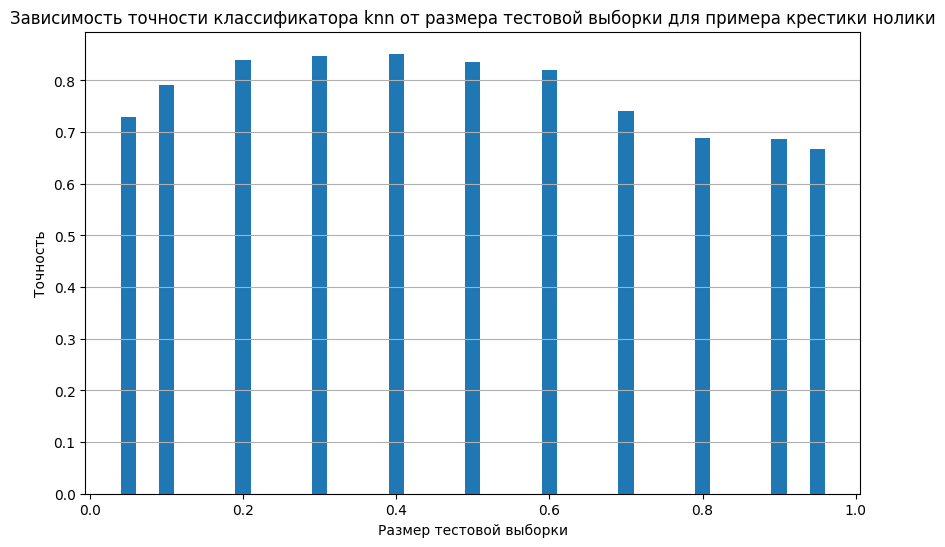

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(test_sizes, accuracies, width=0.02)
plt.title('Зависимость точности классификатора knn от размера тестовой выборки для примера крестики нолики')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.grid(axis='y')
plt.savefig("tic_tac_toe.png")
plt.show()

# 1.2 Задача о классификации Спама 

In [42]:
with open("spam_names.txt", "r") as f:
    names = f.readlines()
    for i in range(len(names)):
        names[i] = names[i].strip().replace(":", "")
names[:2]

['word_freq_make', 'word_freq_address']

In [43]:
spam_data = pd.read_csv("spambase.data", sep=",", header=None, names=names)
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [44]:
X = spam_data.drop("spam", axis=1)
Y = spam_data["spam"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42, shuffle=True)

In [45]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.7904451682953312


In [48]:
test_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
accuracies = []

for test_size in test_sizes:
    X = spam_data.drop("spam", axis=1)
    Y = spam_data["spam"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = 42, shuffle=True)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)
    neigh = KNeighborsClassifier(n_neighbors=5) 
    model = neigh.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))

accuracies

[0.7705627705627706,
 0.7830802603036876,
 0.7904451682953312,
 0.782041998551774,
 0.7734926670287887,
 0.7679269882659713,
 0.7660268018833756,
 0.7575287177895064,
 0.7440912795436023,
 0.7068340980439507,
 0.6961793639899336]

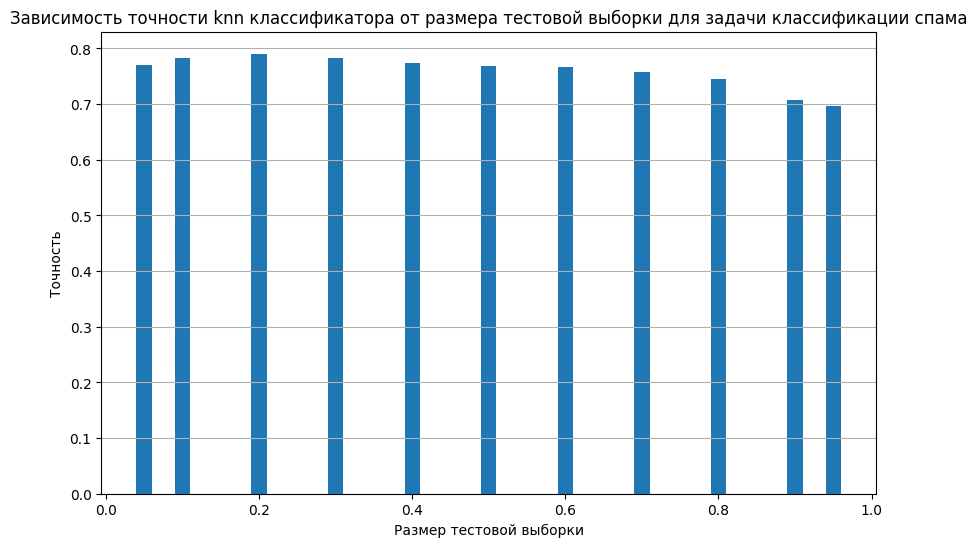

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(test_sizes, accuracies, width=0.02)
plt.title('Зависимость точности knn классификатора от размера тестовой выборки для задачи классификации спама')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')
plt.grid(axis='y')
plt.savefig("spam.png")
plt.show()


# 2. Классификатор для обучающего множества Glass

1. Id number: 1 to 214; 

2. RI: показатель преломления; 

3. Na: сода (процент содержания в соотвествующем оксиде); 

4. Mg; 5. Al; 6. Si; 7. K; 8. Ca; 9. Ba; 10. Fe.

Классы характеризуют тип стекла:

        (1) окна зданий, плавильная обработка

        (2) окна зданий, не плавильная обработка

        (3) автомобильные окна, плавильная обработка

        (4) автомобильные окна, не плавильная обработка (нет в базе)

        (5) контейнеры

        (6) посуда

        (7) фары



In [49]:
data = pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [50]:
X = data.drop("Type", axis=1)
Y = data["Type"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [51]:
neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.7674418604651163


In [52]:
print(model.predict(np.array([[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]])))

[5]


In [53]:
# https://academy.yandex.ru/handbook/ml/article/metricheskiye-metody
# Прямоугольное ядро
def rectangular_kernel(distance):
    return 0.5 * (np.abs(distance) < 1) 

# Треугольное ядро (непрерывное)
def triangular_kernel(distance):
    return (1 - np.abs(distance)) * (np.abs(distance) < 1)

# Ядро Епанечникова
def epanechnikov_kernel(distance):
    return (3/4) * (1 - distance ** 2) * (np.abs(distance) < 1)

# Биквадратное ядро
def biweight_kernel(distance):
    return (15/16) * (1 - distance ** 2) ** 2 * (np.abs(distance) < 1)

# Гауссовское ядро
def gaussian_kernel(distance):
    return np.exp(-0.5 * distance ** 2)

In [54]:
ks = [x for x in range(1, 11)]
weights = ["rectangular", "triangular", "epanechnikov", "biweight", "gauss"]
accuracies = {}

for weight in weights:
    accuracies[weight] = {}
    for k in ks:
        if weight == "uniform":
            kernel_function = lambda x: 1
        elif weight == "rectangular":
            kernel_function = rectangular_kernel
        elif weight == "triangular":
            kernel_function = triangular_kernel
        elif weight == "epanechnikov":
            kernel_function = epanechnikov_kernel
        elif weight == "biweight":
            kernel_function = biweight_kernel
        elif weight == "gaus":
            kernel_function = gaussian_kernel
        else:
            kernel_function = lambda x: 1
        knn = KNeighborsClassifier(n_neighbors=k, weights=kernel_function)
        model = knn.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracies[weight][k] = 1 - accuracy_score(Y_test, Y_pred)
print(accuracies)
 

{'rectangular': {1: 0.39534883720930236, 2: 0.39534883720930236, 3: 0.37209302325581395, 4: 0.39534883720930236, 5: 0.34883720930232553, 6: 0.34883720930232553, 7: 0.39534883720930236, 8: 0.37209302325581395, 9: 0.39534883720930236, 10: 0.37209302325581395}, 'triangular': {1: 0.39534883720930236, 2: 0.39534883720930236, 3: 0.39534883720930236, 4: 0.39534883720930236, 5: 0.37209302325581395, 6: 0.37209302325581395, 7: 0.37209302325581395, 8: 0.37209302325581395, 9: 0.37209302325581395, 10: 0.37209302325581395}, 'epanechnikov': {1: 0.39534883720930236, 2: 0.39534883720930236, 3: 0.39534883720930236, 4: 0.39534883720930236, 5: 0.37209302325581395, 6: 0.37209302325581395, 7: 0.37209302325581395, 8: 0.37209302325581395, 9: 0.37209302325581395, 10: 0.37209302325581395}, 'biweight': {1: 0.39534883720930236, 2: 0.39534883720930236, 3: 0.39534883720930236, 4: 0.39534883720930236, 5: 0.37209302325581395, 6: 0.37209302325581395, 7: 0.37209302325581395, 8: 0.37209302325581395, 9: 0.372093023255813

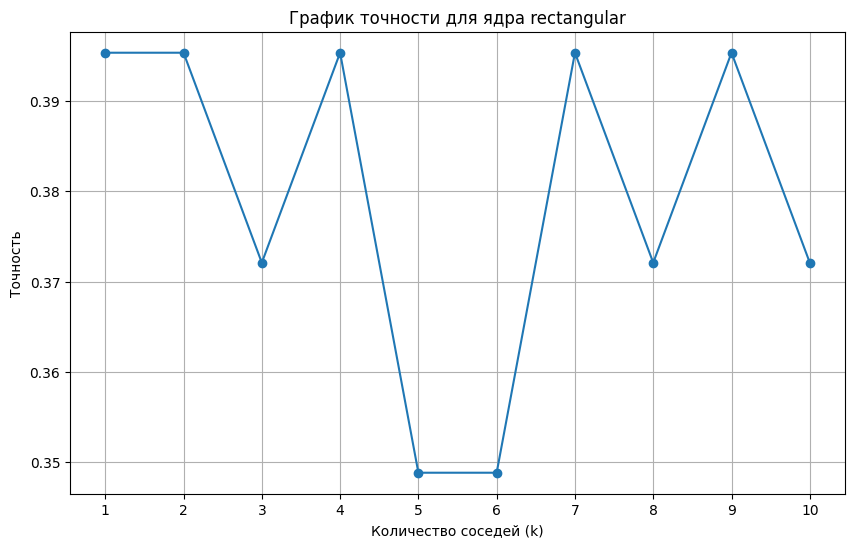

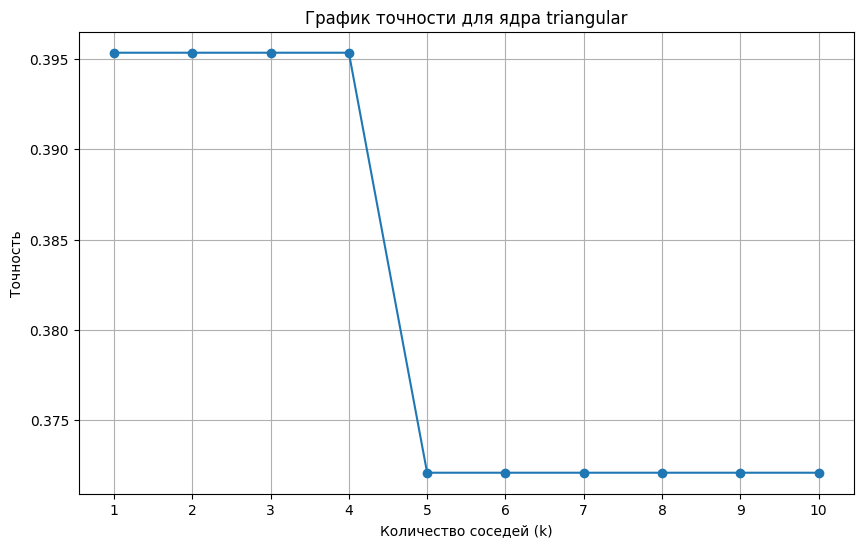

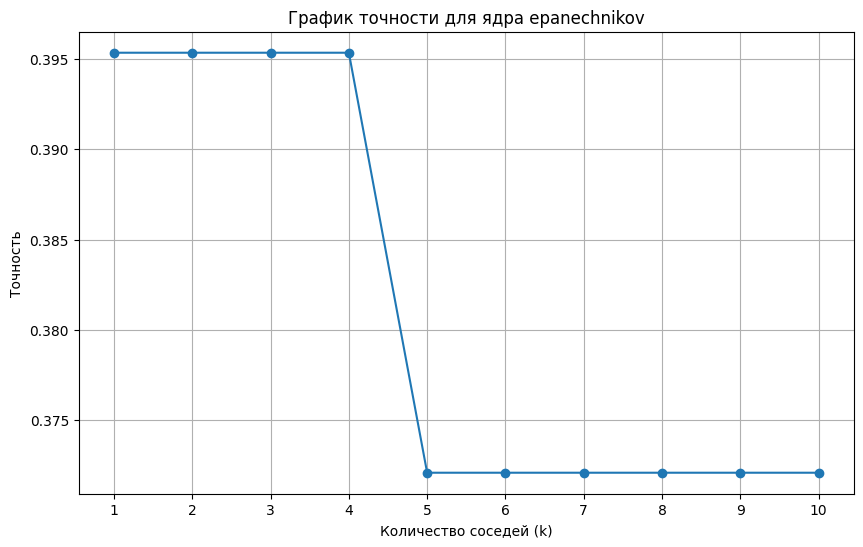

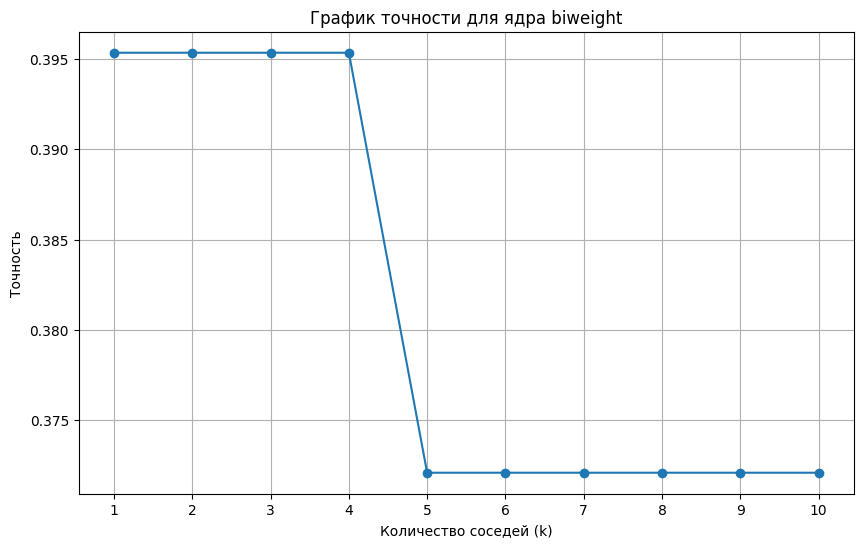

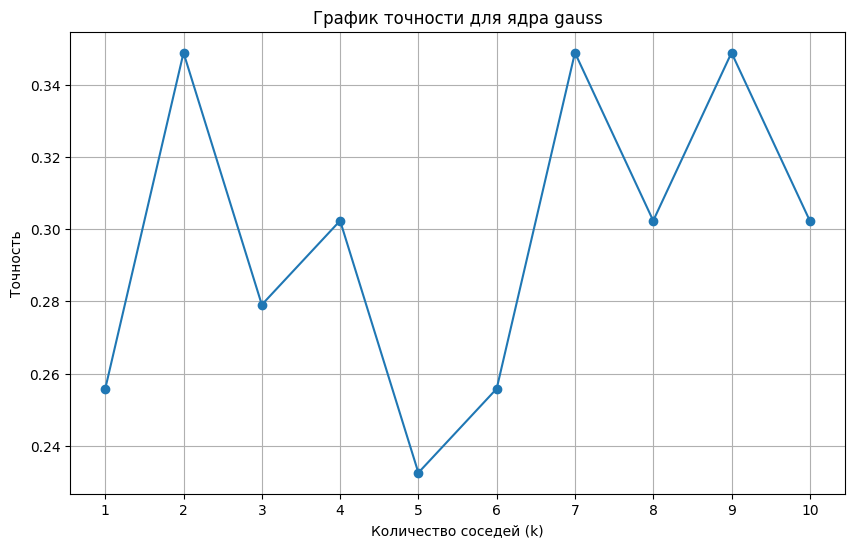

In [55]:
for weight in weights:
    k_values = list(accuracies[weight].keys())
    accuracy_values = list(accuracies[weight].values())

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title(f'График точности для ядра {weight}')
    plt.xlabel('Количество соседей (k)')
    plt.ylabel('Точность')
    plt.xticks(k_values)
    plt.grid(True)
    plt.savefig(f'dif_ks_{weight}.png')
    plt.show()

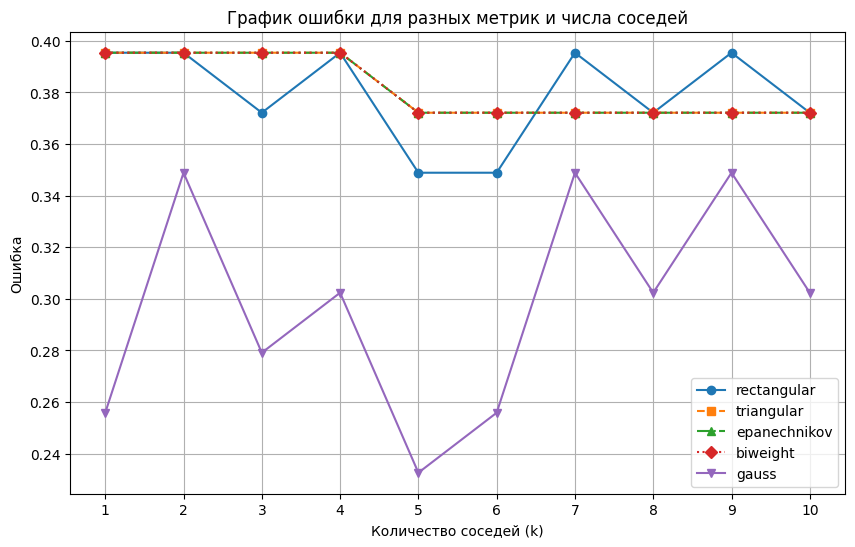

In [62]:
plt.figure(figsize=(10, 6))
weights = ["rectangular", "triangular", "epanechnikov", "biweight", "gauss"]
for weight in weights:
    k_values = list(accuracies[weight].keys())
    accuracy_values = list(accuracies[weight].values())

    plt.plot(k_values, accuracy_values, marker='o', label=f'{weight}')

plt.title('График ошибки для разных метрик и числа соседей')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Ошибка')
plt.xticks(k_values)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('dif_ks_weights.png')
plt.show()

In [154]:
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean'] # kernels
accuracies = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=gaussian_kernel)
    model = knn.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))
print(accuracies)

[0.7441860465116279, 0.7209302325581395, 0.7209302325581395, 0.7441860465116279, 0.7209302325581395, 0.7441860465116279, 0.7209302325581395]


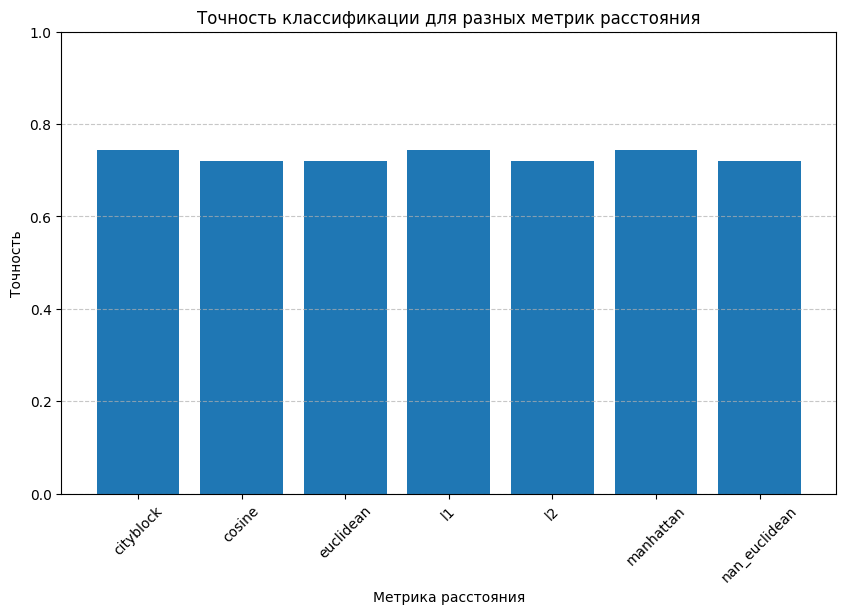

In [158]:
plt.figure(figsize=(10, 6))
plt.bar(metrics, accuracies)
plt.title('Точность классификации для разных метрик расстояния')
plt.xlabel('Метрика расстояния')
plt.ylabel('Точность')
plt.ylim(0, 1)  # Ограничение по оси y от 0 до 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("dif_metrics.png")
plt.show()


# 3. SVM4 DATA

In [6]:
train = pd.read_csv("svmdata4.txt", sep="\t")
test = pd.read_csv("svmdata4test.txt", sep="\t")
train

,X1,X2,Colors
1,11.503087,-0.872017,green
2,6.952235,-0.368240,red
3,9.157642,1.058048,green
4,3.921632,1.703045,green
5,4.019569,0.706163,green
...,...,...,...
196,5.451644,-0.996070,red
197,5.931082,0.570743,green
198,7.550138,-0.689637,red
199,6.354152,0.049233,red


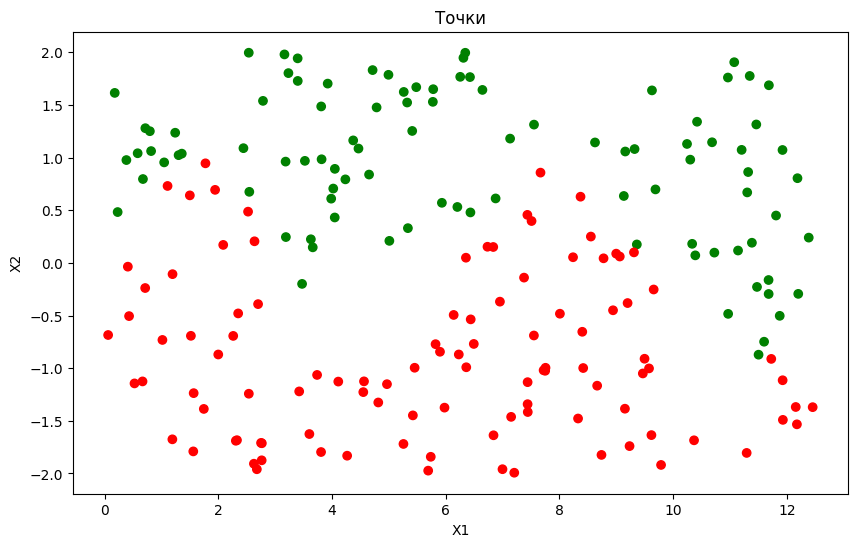

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(train.X1, train.X2, c=train.Colors)
plt.title('Точки')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig("svm4.png")
plt.show()

In [16]:
train["Class"] = (train["Colors"] == "green").astype(int)
test["Class"] = (test["Colors"] == "green").astype(int)
train

,X1,X2,Colors,Class
1,11.503087,-0.872017,green,1
2,6.952235,-0.368240,red,0
3,9.157642,1.058048,green,1
4,3.921632,1.703045,green,1
5,4.019569,0.706163,green,1
...,...,...,...,...
196,5.451644,-0.996070,red,0
197,5.931082,0.570743,green,1
198,7.550138,-0.689637,red,0
199,6.354152,0.049233,red,0


In [21]:
X = train.drop(["Colors", "Class"], axis=1)
Y = train["Class"]

neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(X, Y)
X_test = test.drop(["Colors", "Class"], axis=1)
Y_test = test["Class"]
Y_pred = model.predict(X_test)
acc_score = accuracy_score(Y_test, Y_pred)
acc_score

0.93

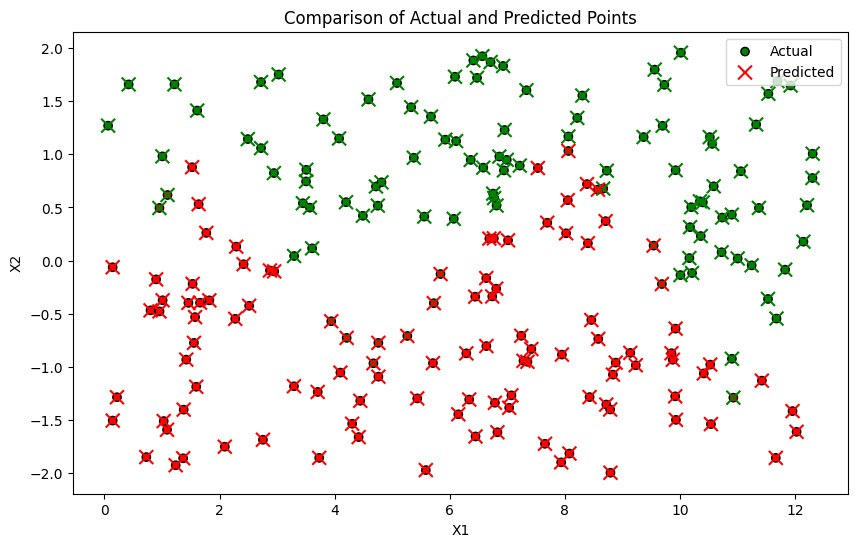

In [29]:
colors_real = ['green' if label == 1 else 'red' for label in Y_test]
colors_pred = ['green' if label == 1 else 'red' for label in Y_pred]

# Create a scatter plot to visualize the comparison between actual and predicted points
plt.figure(figsize=(10, 6))
plt.scatter(test.X1, test.X2, c=colors_real, label='Actual', marker='o', edgecolors='k')
plt.scatter(test.X1, test.X2, c=colors_pred, label='Predicted', marker='x', s=100)
plt.title('Comparison of Actual and Predicted Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.savefig("svm4_test.png")
plt.show()

# 4. Titanic

In [30]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.loc[df["Fare"] > 400, "Fare"] = df["Fare"].median()

In [32]:
df.loc[df["Age"] > 70, "Age"] = 70

In [34]:
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [35]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [36]:
df["Embarked"].fillna("S", inplace = True)

In [37]:
del df["Cabin"]

In [38]:
for column in df:
    print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Embarked :  0


In [39]:
def get_title(name): # Miss, Mrs, Capitan...
    if "." in name:
        return name.split(",")[1].split(".")[0].strip()
    else:
        return "No title"

In [40]:
titles = set([x for x in df.Name.map(lambda x: get_title(x))])
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [41]:
def shorter_titles(x):
    title = x["Title"]
    if title in ["Capt", "Col", "Major"]:
        return "Officer"
    elif title in ["Jonkheer", "Don", "the Countess", "Dona", "Lady", "Sir"]:
        return "Royalty"
    elif title == "Mme":
        return "Mrs"
    elif title in ["Mlle", "Ms"]:
        return "Miss"
    else:
        return title

In [42]:
df["Title"] = df["Name"].map(lambda x: get_title(x))
df["Title"] = df.apply(shorter_titles, axis = 1)
df.Title.value_counts()
df.drop("Name", axis = 1, inplace = True)
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
622,623,1,3,male,20.0,1,1,2653,15.7417,C,Mr
877,878,0,3,male,19.0,0,0,349212,7.8958,S,Mr
809,810,1,1,female,33.0,1,0,113806,53.1000,S,Mrs
94,95,0,3,male,59.0,0,0,364500,7.2500,S,Mr
343,344,0,2,male,25.0,0,0,244361,13.0000,S,Mr
635,636,1,2,female,28.0,0,0,237668,13.0000,S,Miss
242,243,0,2,male,29.0,0,0,W./C. 14263,10.5000,S,Mr
501,502,0,3,female,21.0,0,0,364846,7.7500,Q,Miss
207,208,1,3,male,26.0,0,0,2699,18.7875,C,Mr
152,153,0,3,male,55.5,0,0,A.5. 11206,8.0500,S,Mr


In [43]:
df.Sex.replace(("male", "female"), (0, 1), inplace = True)
df.Embarked.replace(("S", "C", "Q"), (0, 1, 2), inplace = True)
df.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Officer", "Royalty"), (0, 1, 2, 3, 4, 5, 6, 7), inplace = True)
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
363,364,0,3,0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,0,0
94,95,0,3,0,59.0,0,0,364500,7.2500,0,0
175,176,0,3,0,18.0,1,1,350404,7.8542,0,0
611,612,0,3,0,28.0,0,0,SOTON/O.Q. 3101305,7.0500,0,0
528,529,0,3,0,39.0,0,0,3101296,7.9250,0,0
136,137,1,1,1,19.0,0,2,11752,26.2833,0,1
319,320,1,1,1,40.0,1,1,16966,134.5000,1,2
734,735,0,2,0,23.0,0,0,233639,13.0000,0,0
655,656,0,2,0,24.0,2,0,S.O.C. 14879,73.5000,0,0
555,556,0,1,0,62.0,0,0,113807,26.5500,0,0


In [45]:
Y = df["Survived"]
X = df.drop(["Survived","PassengerId", "Ticket"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.69


In [46]:
df_test = pd.read_csv("test.csv")
df_test["Title"] = df_test["Name"].map(lambda x: get_title(x))
df_test["Title"] = df_test.apply(shorter_titles, axis = 1)
ids = df_test["PassengerId"]
df_test["Age"].fillna(df["Age"].median(), inplace = True)
df_test["Fare"].fillna(df["Fare"].median(), inplace = True)
df_test["Embarked"].fillna("S", inplace = True)
df_test.drop("Cabin", axis = 1, inplace = True)
df_test.drop("Ticket", axis = 1, inplace = True)
df_test.drop("Name", axis = 1, inplace = True)
df_test.drop("PassengerId", axis = 1, inplace = True)
df_test.Sex.replace(("male", "female"), (0, 1), inplace = True)
df_test.Embarked.replace(("S", "C", "Q"), (0, 1, 2), inplace = True)
df_test.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Officer", "Royalty"), (0, 1, 2, 3, 4, 5, 6, 7), inplace = True)

In [47]:
predictions = model.predict(df_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,